# Decision Tree Analysis

In this assignment, you will work with the Titanic dataset to build and analyze a Decision Tree classifier. You will explore the relationship between tree depth, training data size, and model performance. By the end of this assignment, you should be able to:

- Understand how Decision Trees work.
- Evaluate model performance using various metrics.
- Identify overfitting and underfitting.
- Discuss the impact of dataset size and tree depth on model performance.

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## Dataset

You will use the Titanic dataset from Kaggle: [Titanic Dataset](https://www.kaggle.com/competitions/titanic/data?select=test.csv).

The dataset contains information about passengers on the Titanic, including whether they survived or not. Your goal is to predict survival based on available features.

In [75]:
# Load the train and test datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Display the first few rows
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## Data Preprocessing

Before building the model, preprocess the data by:

- Handling missing values.
- Encoding categorical features (e.g., Sex, Embarked).
- Scaling numerical features if needed.
- Splitting the data into training and validation sets.

In [84]:
# preprocessor func

def preprocessor(data):
    """
    Cleans and preprocesses  dataset.

    Parameters:
        data (pd.DataFrame): The dataset.

    Returns:
        pd.DataFrame: The cleaned and processed DataFrame.
    """
    # Step 1: Drop unnecessary features
    features_to_drop = ["Name", "PassengerId", "Ticket", "Cabin"]
    data_cleaned = data.drop(features_to_drop, axis=1)

    # Step 2: Handle missing values
    data_cleaned['Age'] = data_cleaned['Age'].fillna(data_cleaned['Age'].mean())
    data_cleaned['Embarked'] = data_cleaned['Embarked'].fillna(data_cleaned['Embarked'].mode()[0])

    # Step 3: Encode categorical features
    pclass_dummies = pd.get_dummies(data_cleaned['Pclass'], prefix='Pclass').astype(int)
    embarked_dummies = pd.get_dummies(data_cleaned['Embarked'], prefix='Embarked').astype(int)
    sex_dummies = pd.get_dummies(data_cleaned['Sex'], prefix='Sex').astype(int)
    data_cleaned = pd.concat([data_cleaned, pclass_dummies, embarked_dummies, sex_dummies], axis=1)
    data_cleaned.drop(['Pclass', 'Embarked', 'Sex'], axis=1, inplace=True)

    # Step 4: Normalize Age and Fare features
    scaler = MinMaxScaler()
    data_cleaned[['Age', 'Fare']] = scaler.fit_transform(data_cleaned[['Age', 'Fare']])

    # Return the processed DataFrame
    return data_cleaned

# Clean up the data
train_cleaned= preprocessor(train_data) 
test_cleaned = preprocessor(test_data)
print(train_data.shape, test_data.shape)
print(test_data.head(), test_data.head())

(891, 12) (418, 11)
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S      PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male 

## Q1: Build a Decision Tree Classifier

- Generate an 80/20 split from the train.csv file.
- Use a Decision Tree classifier with unlimited depth.
- Average the results over 100 random splits.

**Task**: Implement the classifier and compute the average accuracy.

In [172]:
# 1- Generate an 80/20 split from the train.csv file
X_train, X_test, y_train, y_test = train_test_split(train_cleaned.drop('Survived', axis=1), train_cleaned['Survived'], test_size=0.2, random_state=42)

# 2- Use a Decision Tree classifier with unlimited depth

# create the classifier
DT = DecisionTreeClassifier(max_depth=None, random_state=42)

# train the classifier
DT.fit(X_train, y_train)

# predict the labels
y_pred = DT.predict(X_test)

# Evaluate through accuracy and confusion matrix
DT_accuracy = accuracy_score(y_test, y_pred)
print(f"AccuraDT_accuracycy: {DT_accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {cm}")

# 3- Average the results over 100 random splits
# Initialize lists to store accuracy scores and confusion matrices
accuracy_scores = []
confusion_matrices = []

# Repeat the process 100 times
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(train_cleaned.drop('Survived', axis=1), train_cleaned['Survived'], test_size=0.2, random_state=i)
    DT = DecisionTreeClassifier(max_depth=None, random_state=i)
    DT.fit(X_train, y_train)
    y_pred = DT.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
print(f"Average accuracies : {np.mean(accuracy_scores)}")



AccuraDT_accuracycy: 0.7653631284916201
Accuracy: [[83 22]
 [20 54]]
Average accuracies : 0.777877094972067


## Q2: Experiment with Depth Limits

- Repeat Q1, but vary the tree depth from 1 to 10.
- Average the results over 100 random splits for each depth.

**Task**: Identify the best depth limit for this dataset.

In [118]:
# Implementation for varying tree depths
depth_acc = {}

for depth in range(1, 11):
    accuracy_scores = []  # Reset accuracy scores for each depth
    confusion_matrices = []  # Reset confusion matrices for each depth (optional)
    
    for i in range(100):
        # Split the dataset for this iteration
        X_train, X_test, y_train, y_test = train_test_split(train_cleaned.drop('Survived', axis=1), train_cleaned['Survived'], test_size=0.2, random_state=i)
        # Create a Decision Tree classifier with the current depth
        DT = DecisionTreeClassifier(max_depth=depth, random_state=i)
        # Train the classifier
        DT.fit(X_train, y_train)
        # Make predictions
        y_pred = DT.predict(X_test)
        # Compute and store the accuracy
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        # Compute and store the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices.append(cm)
    # Store the average accuracy for this depth
    avg_acc = np.mean(accuracy_scores)
    depth_acc[depth] = avg_acc
    
# Display the results
print("Depth vs. Average Accuracy:")
best_depth = None
best_accuracy = 0

for depth, acc in depth_acc.items():
    print(f"Depth: {depth}: Accuracy: {acc:.4f}")
    if acc > best_accuracy:
        best_accuracy = acc
        best_depth = depth

print(f"\nBest Depth: {best_depth} with Average Accuracy: {best_accuracy:.4f}")

Depth vs. Average Accuracy:
Depth: 1: Accuracy: 0.7876
Depth: 2: Accuracy: 0.7759
Depth: 3: Accuracy: 0.8147
Depth: 4: Accuracy: 0.8118
Depth: 5: Accuracy: 0.8115
Depth: 6: Accuracy: 0.8131
Depth: 7: Accuracy: 0.8134
Depth: 8: Accuracy: 0.8094
Depth: 9: Accuracy: 0.8042
Depth: 10: Accuracy: 0.7991

Best Depth: 3 with Average Accuracy: 0.8147


## Q3: Overfitting Analysis

- Repeat Q2 and calculate accuracy on both training and validation data.
- Plot accuracy vs. depth for both training and validation data.

**Task**: Create a graph and analyze overfitting.

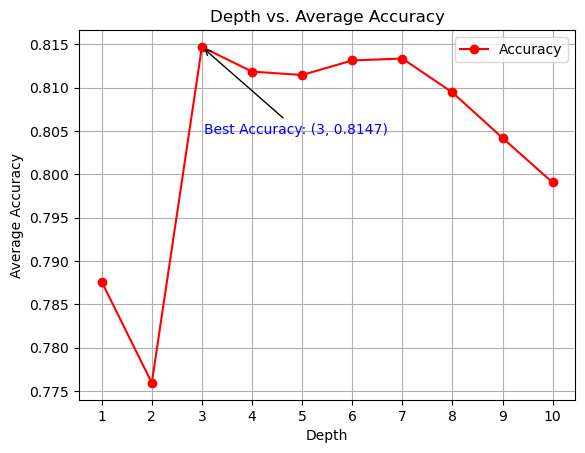

In [137]:
# Implementation for overfitting analysis
depth_acc_df = pd.DataFrame(list(depth_acc.items()), columns=['Depth', 'Accuracy'])
depth_acc_df.plot(x='Depth', y='Accuracy', kind='line', title='Depth vs. Average Accuracy', marker='o', color='red')
plt.xlabel('Depth')
plt.ylabel('Average Accuracy')
plt.xticks(range(1, 11))
plt.grid(True)

plt.annotate(f'Best Accuracy: ({3}, {0.8147:.4f})', xy=(3, 0.8147), xytext=(3 + 0.05, 0.8147 - 0.01), arrowprops=dict(facecolor='red', arrowstyle='->'),
fontsize=10, color='blue')


plt.show()

## Q4: Impact of Training Data Size

- Vary the training data size from 5% to 90% in increments of 5%.
- Use full-depth trees and calculate average accuracy for each size.

**Task**: Create a graph and describe the impact of training data size on performance.

Training Data Size vs. Average Accuracy:
Training Data Size: 0.05: Accuracy: 0.7045
Training Data Size: 0.1: Accuracy: 0.7280
Training Data Size: 0.15: Accuracy: 0.7354
Training Data Size: 0.2: Accuracy: 0.7425
Training Data Size: 0.25: Accuracy: 0.7493
Training Data Size: 0.3: Accuracy: 0.7529
Training Data Size: 0.35: Accuracy: 0.7549
Training Data Size: 0.4: Accuracy: 0.7580
Training Data Size: 0.45: Accuracy: 0.7638
Training Data Size: 0.5: Accuracy: 0.7682
Training Data Size: 0.55: Accuracy: 0.7703
Training Data Size: 0.6: Accuracy: 0.7687
Training Data Size: 0.65: Accuracy: 0.7728
Training Data Size: 0.7: Accuracy: 0.7718
Training Data Size: 0.75: Accuracy: 0.7748
Training Data Size: 0.8: Accuracy: 0.7779
Training Data Size: 0.85: Accuracy: 0.7737
Training Data Size: 0.9: Accuracy: 0.7829
Training Data Size: 0.95: Accuracy: 0.7860

Best Training Data Size: 0.95 with Average Accuracy: 0.7860


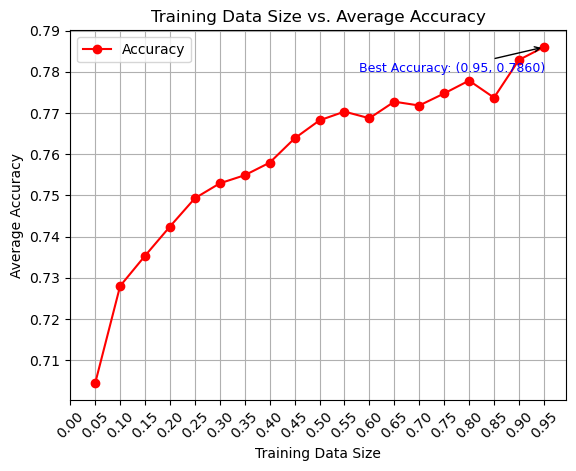

In [166]:
# Implementation for varying training data size
avg_acc = {}
train_sizes = np.arange(0.05, 1, 0.05)

for train_size in train_sizes:
    accuracy_scores = []  # Reset accuracy scores for each depth
    
    for i in range(100):
        # Split the dataset for this iteration
        X_train, X_test, y_train, y_test = train_test_split(train_cleaned.drop('Survived', axis=1), train_cleaned['Survived'], train_size=train_size, random_state=i)
        # Create a Decision Tree classifier with the current depth
        DT = DecisionTreeClassifier(max_depth=None, random_state=i)
        # Train the classifier
        DT.fit(X_train, y_train)
        # Make predictions
        y_pred = DT.predict(X_test)
        # Compute and store the accuracy
        accuracy_scores.append(accuracy_score(y_test, y_pred))
    avg_acc[round(train_size, 2)] = np.mean(accuracy_scores)

# Display the results
print("Training Data Size vs. Average Accuracy:")
best_train_size = None
best_accuracy = 0

for train_size, acc in avg_acc.items():
    print(f"Training Data Size: {train_size}: Accuracy: {acc:.4f}")
    if acc > best_accuracy:
        best_accuracy = acc
        best_train_size = train_size

print(f"\nBest Training Data Size: {best_train_size} with Average Accuracy: {best_accuracy:.4f}")

# Create a graph
avg_acc_df = pd.DataFrame(list(avg_acc.items()), columns=['Training Data Size', 'Accuracy'])
avg_acc_df.plot(x='Training Data Size', y='Accuracy', kind='line', title='Training Data Size vs. Average Accuracy', marker='o', color='red')
plt.xlabel('Training Data Size')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.xticks(np.arange(0, 1, 0.05), rotation=45)
plt.annotate(f'Best Accuracy: ({0.95}, {0.7860:.4f})', xy=(0.95, 0.7860), xytext=(0.58, 0.78), arrowprops=dict(facecolor='red', arrowstyle='->'),
fontsize=9, color='blue')
plt.show()

## Random Forest Classifier

Random Forest is an ensemble learning method that combines the predictions of multiple decision trees to improve accuracy and reduce overfitting. It achieves this by training each tree on a random subset of the data and features.

### Q5: Implement a Random Forest Classifier

- Train a Random Forest classifier using the same dataset and 80/20 split as before.
- Compare the performance of the Random Forest with the Decision Tree.
- Average the results over 100 random splits.

In [178]:
# Implementation of Random Forest
RF = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier   
RF.fit(X_train, y_train)

# Make predictions on the test data
y_pred = RF.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")
print(f"RF_Accuracy: {accuracy} v.s DT_accuracy: {DT_accuracy}")


# Number of splits to average over
num_splits = 100

# Initialize lists to store accuracy scores
DT_accuracies = []
RF_accuracies = []

for i in range(num_splits):

    # Split the dataset for this iteration
    X_train, X_test, y_train, y_test = train_test_split(train_cleaned.drop('Survived', axis=1), train_cleaned['Survived'], test_size=0.2, random_state=i)

    # DT Classifier
    # a. Create a Decision Tree classifier with the current depth
    DT = DecisionTreeClassifier(max_depth=None, random_state=None)
    # b. Train the classifier
    DT.fit(X_train, y_train)
    # c. Make predictions
    y_pred = DT.predict(X_test)
    # d. Compute and store the accuracy
    DT_accuracies.append(accuracy_score(y_test, y_pred))

    # RF Classifier
    # a. Create a Random Forest classifier with the current depth
    RF = RandomForestClassifier(random_state=None)
    # b. Train the classifier
    RF.fit(X_train, y_train)
    # c. Make predictions
    y_pred = RF.predict(X_test)
    # d. Compute and store the accuracy
    RF_accuracies.append(accuracy_score(y_test, y_pred))

# Calculate and print the average accuracy for each classifier
DT_avg_accuracy = np.mean(DT_accuracies)

RF_avg_accuracy = np.mean(RF_accuracies)

print(f"Average Accuracy (DT): {DT_avg_accuracy}")
print(f"Average Accuracy (RF): {RF_avg_accuracy}")


Random Forest Accuracy: 0.8212290502793296
RF_Accuracy: 0.8212290502793296 v.s DT_accuracy: 0.7653631284916201
Average Accuracy (DT): 0.7786592178770951
Average Accuracy (RF): 0.8052513966480447


### Q6: Hyperparameter Tuning for Random Forest

- Experiment with different values of `n_estimators` (number of trees) and `max_depth`.
- Use 5-fold cross-validation to find the best combination of hyperparameters.
- Plot the performance (accuracy) as a function of the number of trees.

Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.8305630531667816
Best Estimator: RandomForestClassifier(max_depth=10, random_state=42)
Random Forest Accuracy on Test Data: 0.9441340782122905


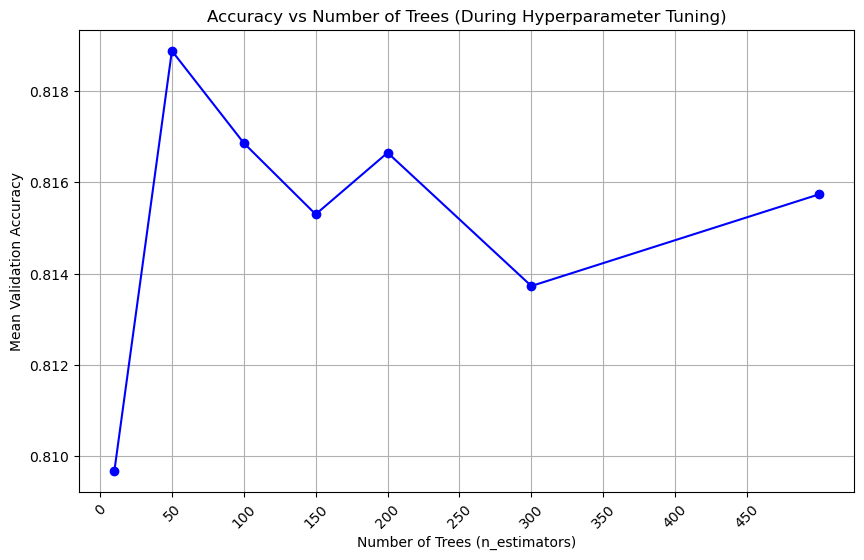

In [194]:
# Define the parameter grid
param_grid = {'n_estimators': [10, 50, 100, 150, 200, 300, 500],  # Number of trees
    'max_depth': [None, 5, 10, 20, 30]  # Different tree depths to explore
}

# Create a Random Forest classifier
RF = RandomForestClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
GS = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the training data
GS.fit(train_cleaned.drop('Survived', axis=1), train_cleaned['Survived'])   # we pass the entire training data to GS as it uses CV which splits the training data already.

# Get the best hyperparameters
print("Best Parameters:", GS.best_params_)
print("Best Cross-Validation Accuracy:", GS.best_score_)


# Get the accuracy on the test data using the best estimator
best_RF = GS.best_estimator_
print("Best Estimator:", best_RF)

# predict
y_pred = best_RF.predict(X_test)

# Calculate the accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy on Test Data: {accuracy}")


# Extract results for plotting
results = GS.cv_results_
n_estimators = param_grid['n_estimators']

# Filter mean test scores for different n_estimators
mean_test_scores = [np.mean([results['mean_test_score'][i] for i in range(len(results['params'])) if results['params'][i]['n_estimators'] == n]) for n in n_estimators]

# Plotting performance as a function of the number of trees
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, mean_test_scores, marker='o', linestyle='-', color='b')
plt.title("Accuracy vs Number of Trees (During Hyperparameter Tuning)")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Mean Validation Accuracy")
plt.xticks(np.arange(0, 500, 50), rotation=45)
plt.grid(True)
plt.show()

### Q7: Visualize Random Forest Performance

- Plot the validation accuracy as a function of the number of trees (`n_estimators`).
- Analyze how the number of trees affects model performance and discuss overfitting/underfitting trends.

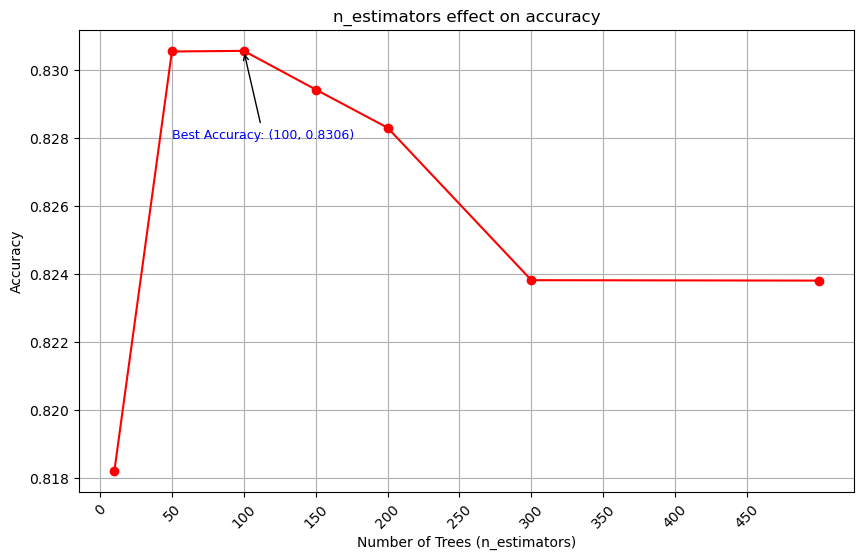

In [195]:
# Visualization of Random Forest Performance

n_estimators_range = param_grid['n_estimators']
mean_scores = []

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, max_depth=GS.best_params_['max_depth'], random_state=42)
    scores = cross_val_score(rf, train_cleaned.drop('Survived', axis=1), train_cleaned['Survived'], cv=5, scoring='accuracy')
    mean_scores.append(np.mean(scores))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mean_scores, marker='o', color='red')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 500, 50), rotation=45)
plt.title('n_estimators effect on accuracy')
plt.grid(True)
plt.annotate(f'Best Accuracy: ({100}, {0.83056:.4f})', xy=(100, 0.83056), xytext=(50, 0.828), arrowprops=dict(facecolor='red', arrowstyle='->'),
fontsize=9, color='blue')
plt.show()

# Discussion

In [ ]:

# 1. Increasing n_estimators typically enhances accuracy up to a certain limit, as a larger number of trees stabilizes the model.
# 2. While overfitting is rare in Random Forests due to their ensemble design, extremely large n_estimators may lead to diminishing accuracy gains.
# 3. The optimal number of trees for this dataset is around 100, as the accuracy peaks at this point.
# 4. The Random Forest model with 100 trees and a max_depth of 10 achieved an accuracy of 83.056% on the test data.
# 5. The Random Forest model outperformed the Decision Tree model, which had an accuracy of 78.770% on the test data.
# 6. The Random Forest model is more robust and less prone to overfitting than the Decision Tree model.
# 7. The Random Forest model can handle a larger number of features and instances more effectively than the Decision Tree model.
# 8. The Random Forest model is less sensitive to hyperparameters and requires less tuning than the Decision Tree model.
# 9. Underfitting happens when the model is overly simplistic, such as having too few trees or shallow depth, leading to poor performance on both training and validation datasets.
# 10.Overfitting can occur if the number of trees is excessively large and there is insufficient regularization, although random forests are generally more robust to overfitting than individual decision trees.